In [2]:
import pandas as pd
import re as re
import matplotlib.pyplot as plt
import importlib.util
import numpy as np 
import seaborn as sns
import pickle
import scipy.stats as stats
from scipy.optimize import curve_fit
from numpy import array 
from statsmodels.stats.weightstats import ttest_ind
import math

In [3]:
def poly_7(x, a, b, c, d, e, f, g, h):
    return a*x**7 + b*x**6 + c*x**5 + d*x**4 + e*x**3 + f*x**2 + g*x + h
def poly_6(x, a, b, c, d, e, f, g):
    return a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x + g
def poly_5(x, a, b, c, d, e, f):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f 


In [ ]:
cpg5=['cg01614020', 'cg19028499', 'cg06626168', 'cg05184256', 'cg24366087','age_group']
# cpgs460 and cpgs50 confidential?

In [4]:
anor = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/nor.pickle', "rb"))
arth = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/rheumatoid_arthritis.pickle', "rb"))


In [5]:
ibs_datainfo = pd.read_excel(r'/Users/xiaoyuemei/Downloads/IBS_meta.xlsx', 'Sheet1')


In [6]:
ibs = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/IBS.pkl', "rb"))
ibs_age = pd.read_excel (r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/IBS ages.xlsx','Sheet1')


In [5]:
ibs_datainfo.source_name_ch1.unique()

array(['CD8', 'CD4', 'WB', 'CD14', 'n4', 'monocytes', 'wh blood',
       'Whole blood'], dtype=object)

In [7]:
ibs_age = ibs_age.set_index('Unnamed: 0')

In [8]:
ibs['status'] = ibs_age['Disease State']
ibs['Age'] = ibs_age['Age']

In [10]:
ibs_nor = ibs[ibs['status']=='HC']
ibs_dis = ibs[ibs['status']!='HC']

In [11]:
# if want to include only WH IBS ---
# ibs_wb_gses = ibs_datainfo[(ibs_datainfo['source_name_ch1'] == 'wh blood') | 
#              (ibs_datainfo['source_name_ch1'] == 'Whole blood') | 
#              (ibs_datainfo['source_name_ch1'] == 'WB')]
# ibs_wb_gen_gses = ibs_wb_gses[(ibs_wb_gses['type'] == 'genomic') ]
# ibs_wb_inonlyori = ibs.T[ibs.index.intersection(ibs_wb_gses['Unnamed: 0'])].T
# ibs_nor = ibs_wb_inonlyori[ibs_wb_inonlyori['status']=='HC']
# ibs_nor['dataset'] = 'ibs_nor'

# ibs_dis = ibs_wb_inonlyori[ibs_wb_inonlyori['status']!='HC']
# ibs_dis['dataset'] = 'ibs_dis'
# ibs_nor = ibs_nor[ibs_nor['Age']>24]
# ibs_dis = ibs_dis[ibs_dis['Age']>24]

In [20]:
#ibs_wb_inonlyori

ID_REF,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873,status,Age
GSM2336819,0.549209,0.899991,0.757192,0.254714,0.782396,0.537098,0.826841,0.343745,0.383886,0.043136,...,0.485624,0.942371,0.488452,0.855391,0.581672,0.92238,0.817588,0.797783,HC,30.8
GSM2336821,0.536237,0.898268,0.796119,0.24402,0.723803,0.561323,0.829576,0.283472,0.408616,0.046047,...,0.522881,0.536366,0.920109,0.113204,0.602383,0.079792,0.571661,0.848829,CD,21.1
GSM2336827,0.519933,0.906677,0.706958,0.241028,0.74487,0.542393,0.821062,0.351254,0.371266,0.04357,...,0.503136,0.944359,0.919438,0.844187,0.929128,0.920838,0.823921,0.760134,HC,30.7
GSM2336832,0.549741,0.899432,0.795014,0.286338,0.767504,0.552438,0.828324,0.282016,0.365323,0.048341,...,0.513388,0.070074,0.921308,0.613464,0.588418,0.509357,0.212338,0.849751,CD,42.1
GSM2336833,0.5526,0.905726,0.805958,0.263665,0.739862,0.588939,0.834798,0.390893,0.372192,0.045892,...,0.520497,0.539608,0.490323,0.876,0.585221,0.513731,0.590028,0.836758,HC,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2337044,0.523339,0.933818,0.834278,0.329846,0.734903,0.702135,0.832466,0.315747,0.394558,0.046274,...,0.496994,0.951697,0.934524,0.578595,0.602641,0.072439,0.560174,0.884999,UC,30.8
GSM2337048,0.549814,0.928072,0.853179,0.27892,0.803182,0.699602,0.863693,0.31491,0.443918,0.055813,...,0.874252,0.588243,0.520405,0.921257,0.129862,0.519094,0.594959,0.876624,UC,62.4
GSM2337055,0.574472,0.930687,0.836744,0.268772,0.769004,0.707079,0.853384,0.290878,0.466079,0.057271,...,0.114142,0.063007,0.060613,0.580962,0.604596,0.070221,0.543221,0.678708,HC,27.3
GSM2337056,0.538766,0.937964,0.865123,0.271731,0.762731,0.784256,0.871394,0.294934,0.391865,0.053007,...,0.476765,0.947183,0.926799,0.094965,0.570425,0.075604,0.8999,0.897679,UC,19.1


In [13]:
ibs_dis = ibs_dis[ibs_dis['Age']>24]
ibs_dis['age_group'] = pd.cut(
    ibs_dis['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])
ibs_nor = ibs_nor[ibs_nor['Age']>24]
ibs_nor['age_group'] = pd.cut(
    ibs_nor['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])
ibs_dis460 = ibs_dis[cpgs460]
ibs_nor460 = ibs_nor[cpgs460]

In [14]:
down = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/Down_syndrome.pkl', "rb"))
ibs = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/IBS.pkl', "rb"))
ibs_age = pd.read_excel (r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/IBS ages.xlsx','Sheet1')
ms = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/MS.pickle', "rb"))
parknor = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/norm_park.pickle', "rb"))
park = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/dis_park.pickle', "rb"))
werner = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/Werner_Syndrome.pickle', "rb")) 


In [15]:
#hannum = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/hannum.pickle', "rb"))
hiv = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/HIV_male.pkl', "rb"))


In [16]:
down_nor = down.iloc[26:, :]
down_nor['dataset'] = 'down_nor'

down_dis = down.iloc[:26, :]
down_dis['dataset'] = 'down_dis'

anor = anor.rename(columns={'age':'Age'})
anor['dataset'] = 'anor'

arth = arth.rename(columns={'age':'Age'})
arth['dataset'] = 'arth'

park= park.rename(columns={'age':'Age'})
park['dataset'] = 'park'

parknor= parknor.rename(columns={'age':'Age'})
parknor['dataset'] = 'parknor'

werner = werner.rename(columns={'age':'Age'})
mask = ~werner.index.isin([('GSE100825', 'GSM2694066'), ('GSE100825', 'GSM2694068'),('GSE100825', 'GSM2694070')])
Werner_Syndrome_h = werner.loc[mask]
Werner_Syndrome_h['dataset'] = 'Werner_Syndrome_h'

mask = ~werner.index.isin([('GSE100825', 'GSM2694067'), ('GSE100825', 'GSM2694069'),('GSE100825', 'GSM2694071')])
Werner_Syndrome_d = werner.loc[mask]
Werner_Syndrome_d['dataset'] = 'Werner_Syndrome_d'

ms = ms.rename(columns={'age':'Age'})
ms['Age'] = ms['Age'].astype(str).astype(int)
ms_nor = ms[ms['status']=='Healthy control']
ms_nor['dataset'] = 'ms_nor'

ms_dis = ms[ms['status']!='Healthy control']
ms_dis['dataset'] = 'ms_dis'

ibs_age = ibs_age.set_index('Unnamed: 0')
ibs['Age'] = ibs_age['Age']
ibs['status'] = ibs_age['Disease State']
ibs_nor_240 = ibs[ibs['status']=='HC']
ibs_nor_240['dataset'] = 'ibs_nor'

ibs_dis_240 = ibs[ibs['status']!='HC']
ibs_dis_240['dataset'] = 'ibs_dis'


/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_18539/2138708174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down_nor['dataset'] = 'down_nor'
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_18539/2138708174.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down_dis['dataset'] = 'down_dis'
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_18539/2138708174.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [17]:
combine_healthy_common = pd.concat([parknor, anor, ms_nor, ibs_nor, down_nor, Werner_Syndrome_h], ignore_index=True, sort=False).dropna(axis=1)
combine_dis_nohiv = pd.concat([park, arth, ms_dis, ibs_dis, down_dis, Werner_Syndrome_d], ignore_index=True, sort=False)

# #ibs edition
# combine_healthy_noibs = pd.concat([parknor, anor, ms_nor, down_nor, Werner_Syndrome_h], ignore_index=True, sort=False)
# combine_dis_noibs_nohiv = pd.concat([park, arth, ms_dis, down_dis, Werner_Syndrome_d], ignore_index=True, sort=False)
# combine_dis_havehiv_ori =  pd.concat([park, arth, ms_dis, ibs_dis_240, down_dis, Werner_Syndrome_d, hiv], ignore_index=True, sort=False)

In [21]:
combine_dis_havehiv_ori_ibs =  pd.concat([park, arth, ms_dis, down_dis, Werner_Syndrome_d, hiv], ignore_index=True, sort=False)
combine_dis_havehiv_ori_ibs = combine_dis_havehiv_ori_ibs[combine_dis_havehiv_ori_ibs['Age']>24]
combine_dis_havehiv_ori_ibs['age_group'] = pd.cut(
    combine_dis_havehiv_ori_ibs['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])

combine_dis_havehiv_newibs = pd.concat([combine_dis_havehiv_ori_ibs[cpgs460], ibs_dis460], ignore_index=True)


In [32]:

#combine_dis_nohiv = combine_dis_nohiv.dropna(axis=1)

In [20]:
combine_healthy_common = combine_healthy_common[combine_healthy_common['Age']>24]
combine_healthy_common['age_group'] = pd.cut(
    combine_healthy_common['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])
combine_dis_nohiv = combine_dis_nohiv[combine_dis_nohiv['Age']>24]
combine_dis_nohiv['age_group'] = pd.cut(
    combine_dis_nohiv['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])

# combine_healthy_noibs = combine_healthy_noibs[combine_healthy_noibs['Age']>24]
# combine_healthy_noibs['age_group'] = pd.cut(
#     combine_healthy_noibs['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
#                            labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
#                                    '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
#                                    '77-80', '>80'])

# combine_dis_noibs_nohiv = combine_dis_noibs_nohiv[combine_dis_noibs_nohiv['Age']>24]
# combine_dis_noibs_nohiv['age_group'] = pd.cut(
#     combine_dis_noibs_nohiv['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
#                            labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
#                                    '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
#                                    '77-80', '>80'])

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_18539/880507574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_healthy_common['age_group'] = pd.cut(


In [150]:
# combine_healthy_common_newibs = pd.concat([combine_healthy_common, ibs_nor_concated], ignore_index=True).dropna(axis=1)
# combine_dis_nohiv_newibs = pd.concat([combine_dis_nohiv, ibs_dis_concated], ignore_index=True).dropna(axis=1)

# combine_healthy_common_newibs = pd.concat([combine_healthy_noibs, ibs_nor460], ignore_index=True).dropna(axis=1)
# combine_dis_nohiv_newibs = pd.concat([combine_dis_noibs_nohiv, ibs_dis460], ignore_index=True)


In [21]:
healthy_5vg_newibs = combine_healthy_common[cpg5].groupby('age_group').std().sum(axis=1).to_frame()
dis_5vg_newibs = combine_dis_nohiv[cpg5].groupby('age_group').std().sum(axis=1).to_frame()

healthy_460_newibs = combine_healthy_common[cpgs460].groupby('age_group').std().sum(axis=1).to_frame()
dis_460_newibs = combine_dis_nohiv[cpgs460].groupby('age_group').std().sum(axis=1).to_frame()

healthy_293_newibs = combine_healthy_common[CpGs293].groupby('age_group').std().sum(axis=1).to_frame()
dis_293_newibs = combine_dis_nohiv[CpGs293].groupby('age_group').std().sum(axis=1).to_frame()


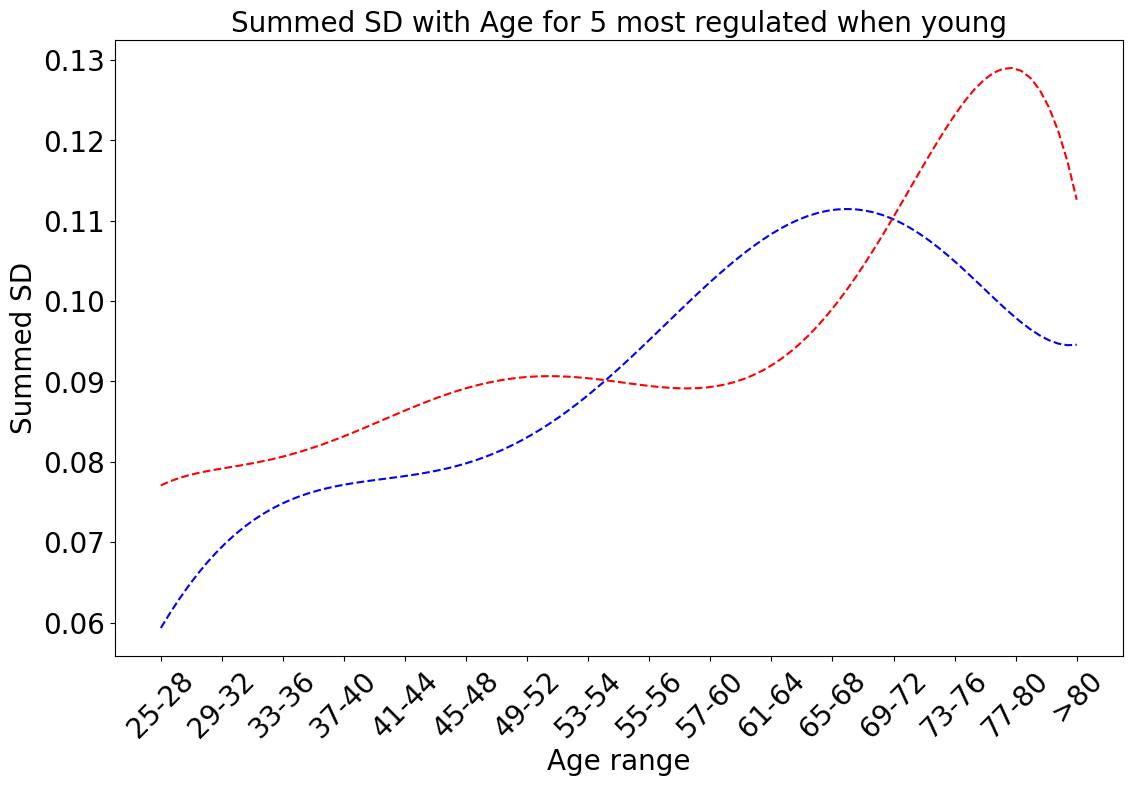

In [24]:
x = np.array(np.arange(16))
my_xticks = healthy_5vg_newibs.index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
# plt.scatter(x, common_d_fsig.groupby('age_group').std().dropna(axis=0).drop(columns='Age').sum(axis=1),color = 'r')
popt, pcov = curve_fit(poly_6, x, healthy_5vg_newibs[0])
x_range = np.linspace(0, 15, 100)

popt_d, pcov_d = curve_fit(poly_6, x, dis_5vg_newibs[0])

plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
plt.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='--')
plt.title("Summed SD with Age for 5 most regulated when young", fontsize=20)
plt.xlabel('Age range', fontsize=20)
plt.ylabel('Summed SD', fontsize=20)

plt.show()

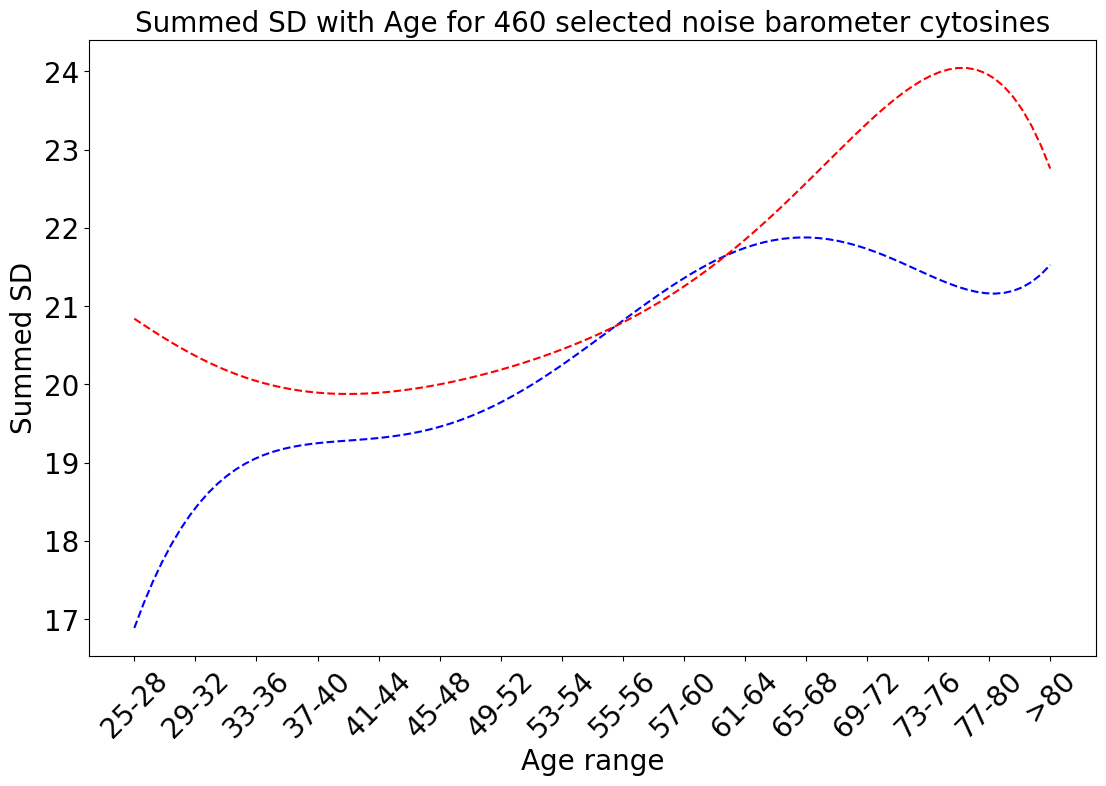

In [25]:
x = np.array(np.arange(16))
my_xticks = healthy_460_newibs.index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
# plt.scatter(x, common_d_fsig.groupby('age_group').std().dropna(axis=0).drop(columns='Age').sum(axis=1),color = 'r')
popt, pcov = curve_fit(poly_6, x, healthy_460_newibs[0])
x_range = np.linspace(0, 15, 100)

popt_d, pcov_d = curve_fit(poly_6, x, dis_460_newibs[0])

plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
plt.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='--')
plt.title("Summed SD with Age for 460 selected noise barometer cytosines", fontsize=20)
plt.xlabel('Age range', fontsize=20)
plt.ylabel('Summed SD', fontsize=20)

plt.show()

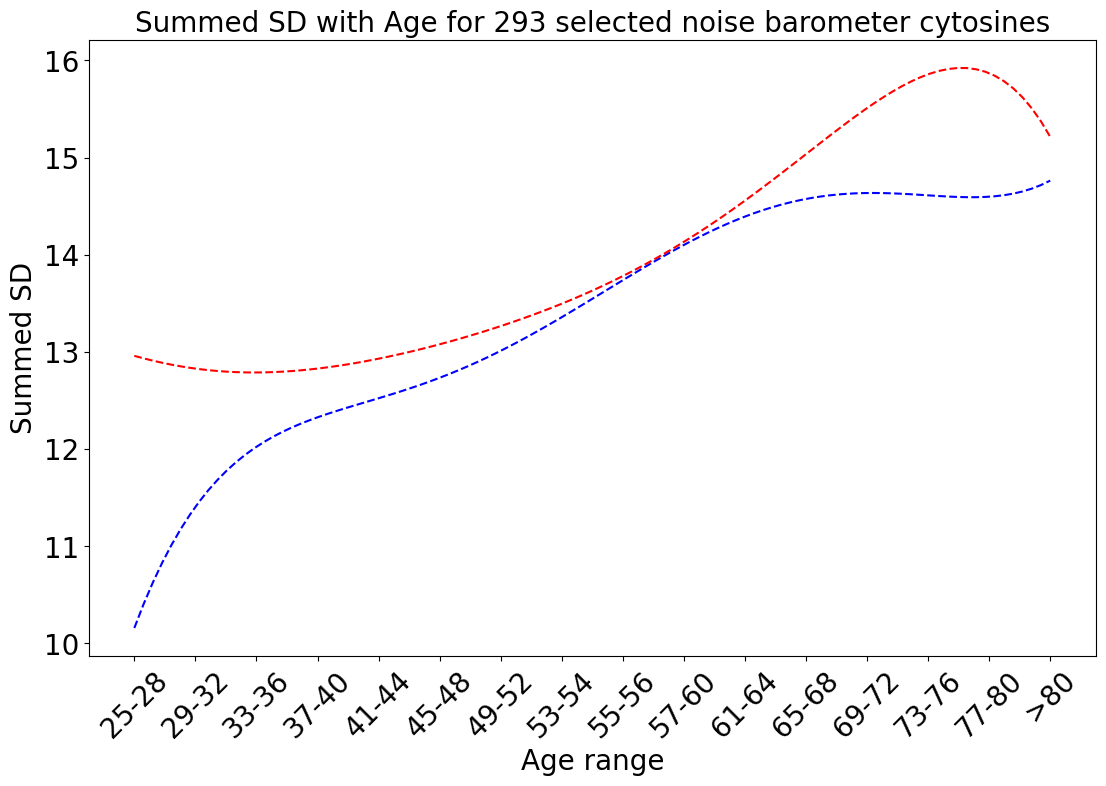

In [30]:
x = np.array(np.arange(16))
my_xticks = healthy_293_newibs.index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
# plt.scatter(x, common_d_fsig.groupby('age_group').std().dropna(axis=0).drop(columns='Age').sum(axis=1),color = 'r')
popt, pcov = curve_fit(poly_6, x, healthy_293_newibs[0])
x_range = np.linspace(0, 15, 100)

popt_d, pcov_d = curve_fit(poly_6, x, dis_293_newibs[0])

plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
plt.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='--')
plt.title("Summed SD with Age for 293 selected noise barometer cytosines", fontsize=20)
plt.xlabel('Age range', fontsize=20)
plt.ylabel('Summed SD', fontsize=20)

plt.show()

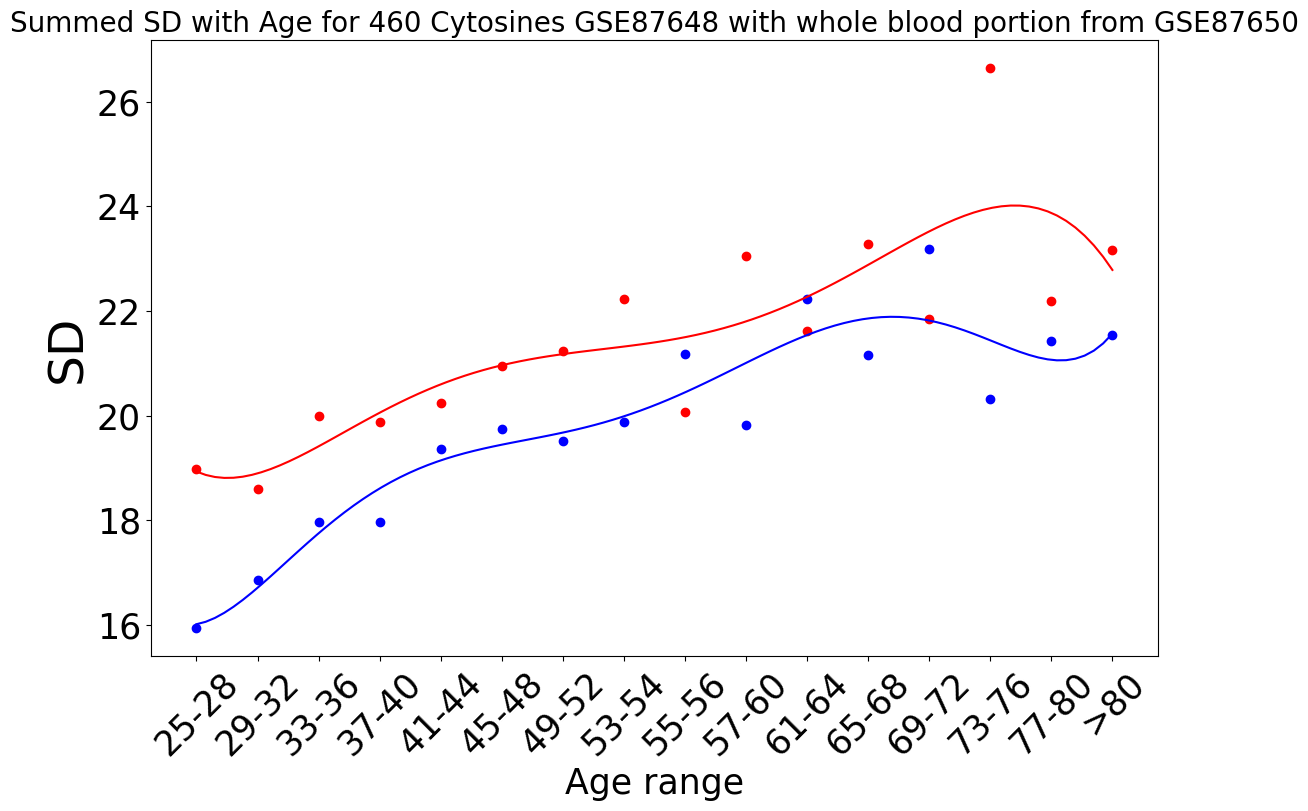

In [30]:
# supplemtary figure, need to change the combine_healthy_common_newibs to combine_healthy_common
# and change combine_dis_havehiv_newibs to combine_dis_nohiv to include the original(non-filtered) IBS

combine_healthy_common_newibs_concat = combine_healthy_common_newibs.groupby('age_group').std().sum(axis=1).to_frame()
combine_healthy_common_newibs_concat[0] = combine_healthy_common_newibs_concat[0].replace(0, np.nan)

combine_dis_nohiv_newibs_concat = combine_dis_havehiv_newibs.groupby('age_group').std().sum(axis=1).to_frame()
combine_dis_nohiv_newibs_concat[0] = combine_dis_nohiv_newibs_concat[0].replace(0, np.nan)

x = np.array(np.arange(16))
my_xticks = combine_healthy_common_newibs_concat.index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)


zip_agegroup_SD = list(zip(x, combine_healthy_common_newibs_concat[0]))
first_numbers = [item[0] for item in zip_agegroup_SD if not math.isnan(item[1])]
second_numbers = [item[1] for item in zip_agegroup_SD if not math.isnan(item[1])]

popt, pcov = curve_fit(poly_6, first_numbers, second_numbers)
x_range = np.linspace(min(first_numbers), max(first_numbers), 100)
plt.scatter(x, combine_healthy_common_newibs_concat[0], color = 'b')

plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='-')
plt.title("Summed SD with Age for 460 Cytosines GSE87648 with whole blood portion from GSE87650", fontsize=20)
plt.xlabel('Age range', fontsize=25)
plt.ylabel('SD', fontsize=35)

zip_agegroup_SD_d = list(zip(x, combine_dis_nohiv_newibs_concat[0]))
first_numbers_d = [item[0] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
second_numbers_d = [item[1] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
popt_d, pcov = curve_fit(poly_6, first_numbers_d, second_numbers_d)
x_range = np.linspace(min(first_numbers_d), max(first_numbers_d), 100)

plt.scatter(x, combine_dis_nohiv_newibs_concat[0], color = 'r')

plt.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='-')
# plt.locator_params(axis='y', nbins=5)

plt.show()

The following three single cytosine used a slightly different age range selection(around age 57 to 64) compared to the plots in the published figure, where the below figures did "57-60, 61-64". but the  plots in the manuscript used "58-64" (combining the two ranges here). Need slight code revision when establishing the "age_group" paramter to make the two visualization match to each other completely. But the data and SDs are all the same, just slight/subtle change in presentation

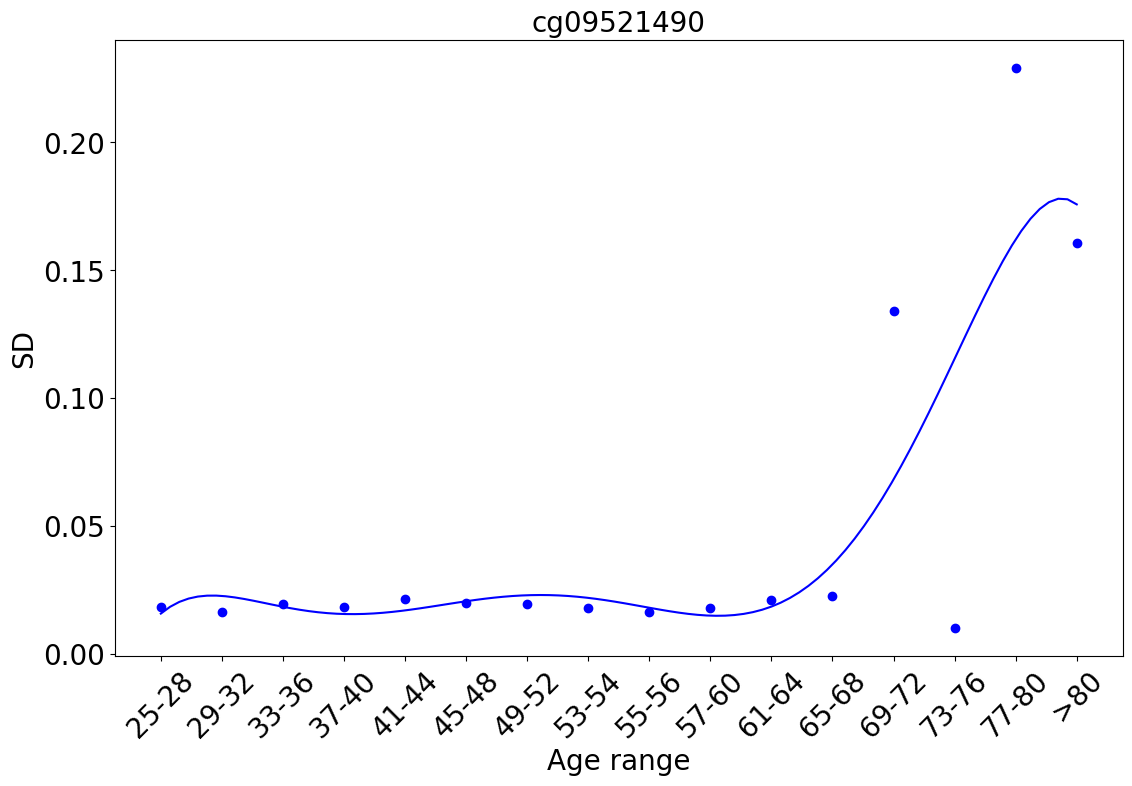

In [34]:
combine_healthy_cg09521490 = combine_healthy_common.groupby('age_group').std()['cg09521490'].to_frame()
x = np.array(np.arange(16))
my_xticks = combine_dis_nohiv.groupby('age_group').std().index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.scatter(x, combine_healthy_cg09521490['cg09521490'],color = 'b')
popt, pcov = curve_fit(poly_6, x, combine_healthy_cg09521490['cg09521490'])
x_range = np.linspace(0, 15, 100)
plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='-')
plt.title("cg09521490", fontsize=20)

plt.xlabel('Age range', fontsize=20)
plt.ylabel('SD', fontsize=20)

plt.show()

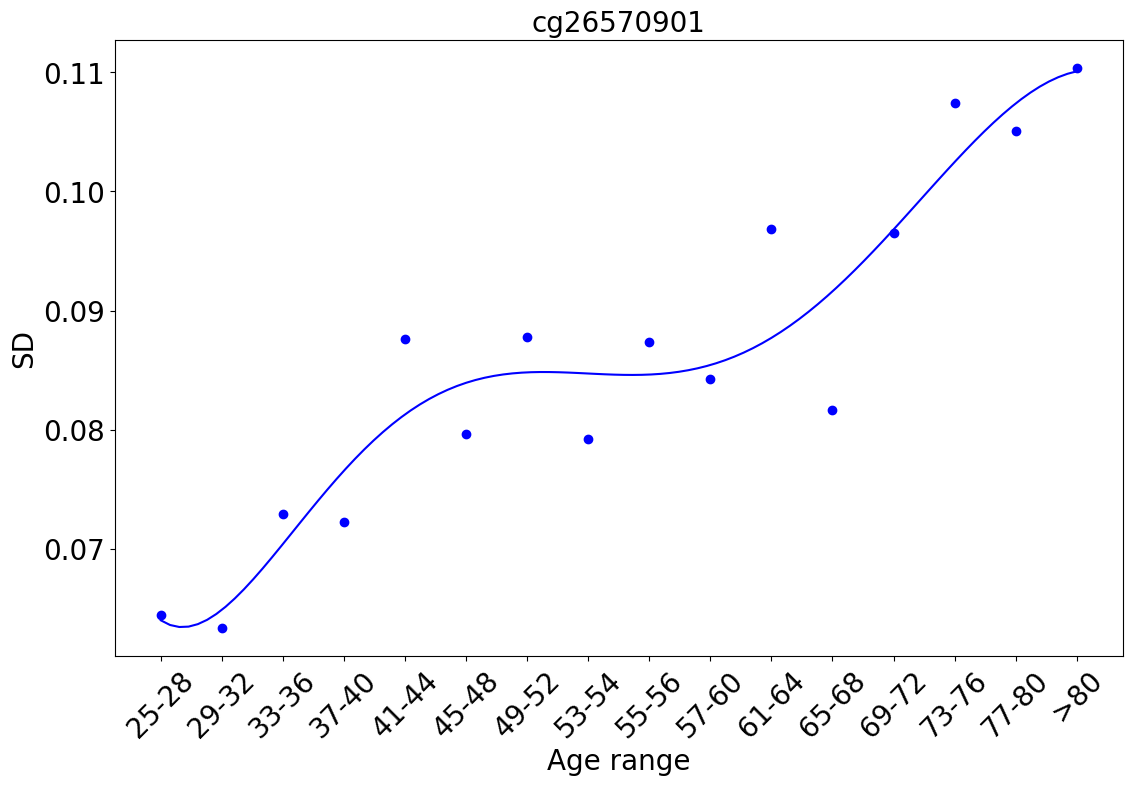

In [32]:
combine_healthy_cg26570901 = combine_healthy_common.groupby('age_group').std()['cg26570901'].to_frame()
x = np.array(np.arange(16))
my_xticks = combine_dis_nohiv.groupby('age_group').std().index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.scatter(x, combine_healthy_cg26570901['cg26570901'],color = 'b')
popt, pcov = curve_fit(poly_6, x, combine_healthy_cg26570901['cg26570901'])
x_range = np.linspace(0, 15, 100)
plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='-')
plt.title("cg26570901", fontsize=20)

plt.xlabel('Age range', fontsize=20)
plt.ylabel('SD', fontsize=20)

plt.show()

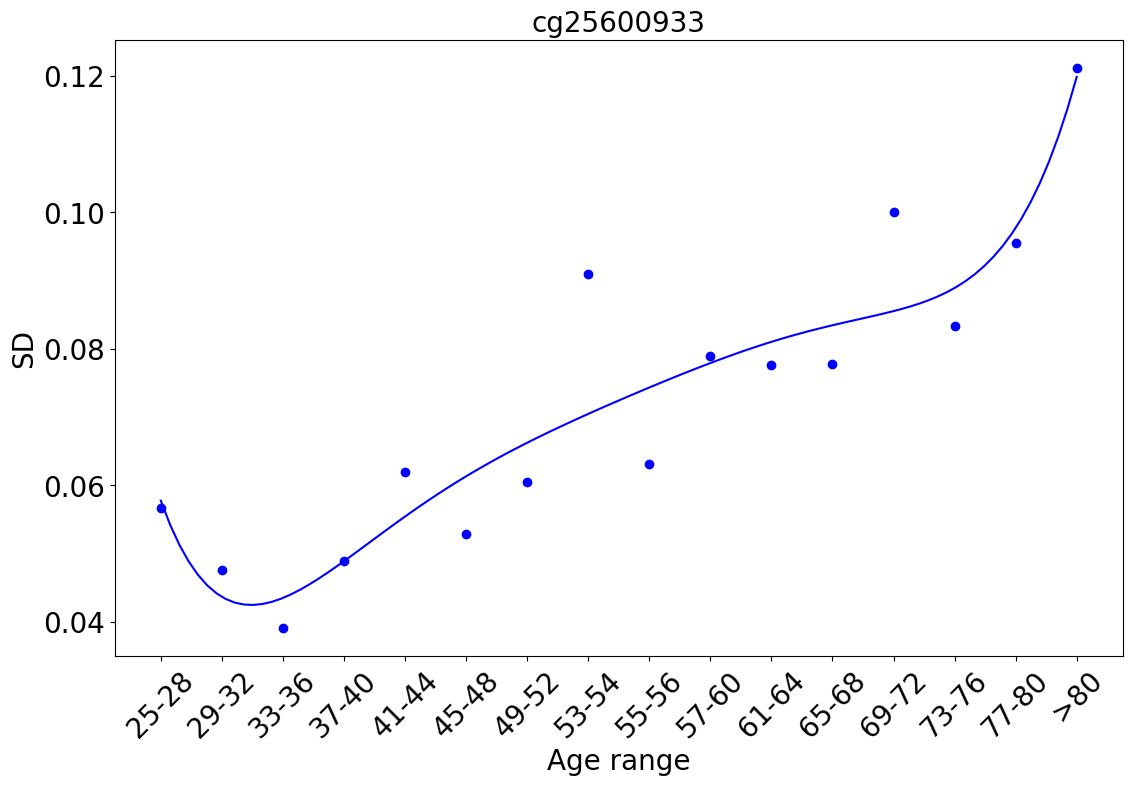

In [33]:
combine_healthy_cg25600933 = combine_healthy_common.groupby('age_group').std()['cg25600933'].to_frame()
x = np.array(np.arange(16))
my_xticks = combine_dis_nohiv.groupby('age_group').std().index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.scatter(x, combine_healthy_cg25600933['cg25600933'],color = 'b')
popt, pcov = curve_fit(poly_6, x, combine_healthy_cg25600933['cg25600933'])
x_range = np.linspace(0, 15, 100)
plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='-')
plt.title("cg25600933", fontsize=20)

plt.xlabel('Age range', fontsize=20)
plt.ylabel('SD', fontsize=20)

plt.show()

In [6]:
combine_healthy_3df = pd.concat([parknor, anor, ms_nor]).dropna(axis=1)


In [1]:
combine_healthy_3df = combine_healthy_3df[combine_healthy_3df['Age']>24]
combine_healthy_3df['age_group'] = pd.cut(
    combine_healthy_3df['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])
combine_healthy_3df_5 = combine_healthy_3df[cpg5]
combine_healthy_3df_5['dataset'] = combine_healthy_3df['dataset']
combine_healthy_3df_293 = combine_healthy_3df[CpGs293]
combine_healthy_3df_293['age_group'] = combine_healthy_3df['age_group']
combine_healthy_3df_293['dataset'] = combine_healthy_3df['dataset']
combine_healthy_3df_460= combine_healthy_3df[cpgs460]
combine_healthy_3df_460['dataset'] = combine_healthy_3df['dataset']
combine_healthy_3df_143k = combine_healthy_3df[common_h_fsig.columns.to_list()]
combine_healthy_3df_143k['dataset'] = combine_healthy_3df['dataset']


In [85]:
combine_healthy_common[combine_healthy_common.columns.intersection(CpGs293)].groupby('age_group').std().sum(axis=1).to_frame()


,0
age_group,
25-28,10.021086
29-32,11.794869
33-36,11.999518
37-40,11.589913
41-44,12.923695
45-48,13.004065
49-52,13.023018
53-54,13.154373
55-56,13.988239


In [508]:
test_ADM_lst_ab = []
for i in combine_healthy_3df_143k.age_group.unique():
    test = combine_healthy_common[combine_healthy_common['age_group'] == i][combine_healthy_common.columns.intersection(combine_healthy_3df_5.columns)].drop(columns='age_group').drop(columns='dataset')
    test_ADM_ab = abs(test- test.mean()).sum(axis=1).mean()
    test_ADM_lst_ab.append(test_ADM_ab)
    
test_ADM_lst_d_ab = []
for i in combine_healthy_3df_143k.age_group.unique():
    test_d = combine_dis_nohiv[combine_dis_nohiv['age_group'] == i][combine_dis_nohiv.columns.intersection(combine_healthy_3df_5.columns)].drop(columns='age_group').drop(columns='dataset')
    test_ADM_d_ab = abs(test_d- test_d.mean()).mean().mean()
    test_ADM_lst_d_ab.append(test_ADM_d_ab)



In [36]:
fig5b_460 = pd.read_excel(r'/Users/xiaoyuemei/Downloads/Supplementary_fig_3df.xlsx', '460cyt')
fig5b_460 = fig5b_460.replace(0, np.nan).set_index('Age_group')
fig5b_143k = pd.read_excel(r'/Users/xiaoyuemei/Downloads/Supplementary_fig_3df.xlsx', '143kcyt')
fig5b_143k = fig5b_143k.replace(0, np.nan).set_index('Age_group')
fig5b_5 = pd.read_excel(r'/Users/xiaoyuemei/Downloads/Supplementary_fig_3df.xlsx', '5cyt')
fig5b_5 = fig5b_5.replace(0, np.nan).set_index('Age_group')
fig5b_293 = pd.read_excel(r'/Users/xiaoyuemei/Downloads/Supplementary_fig_3df.xlsx', '293cyt')
fig5b_293 = fig5b_293.replace(0, np.nan).set_index('Age_group')


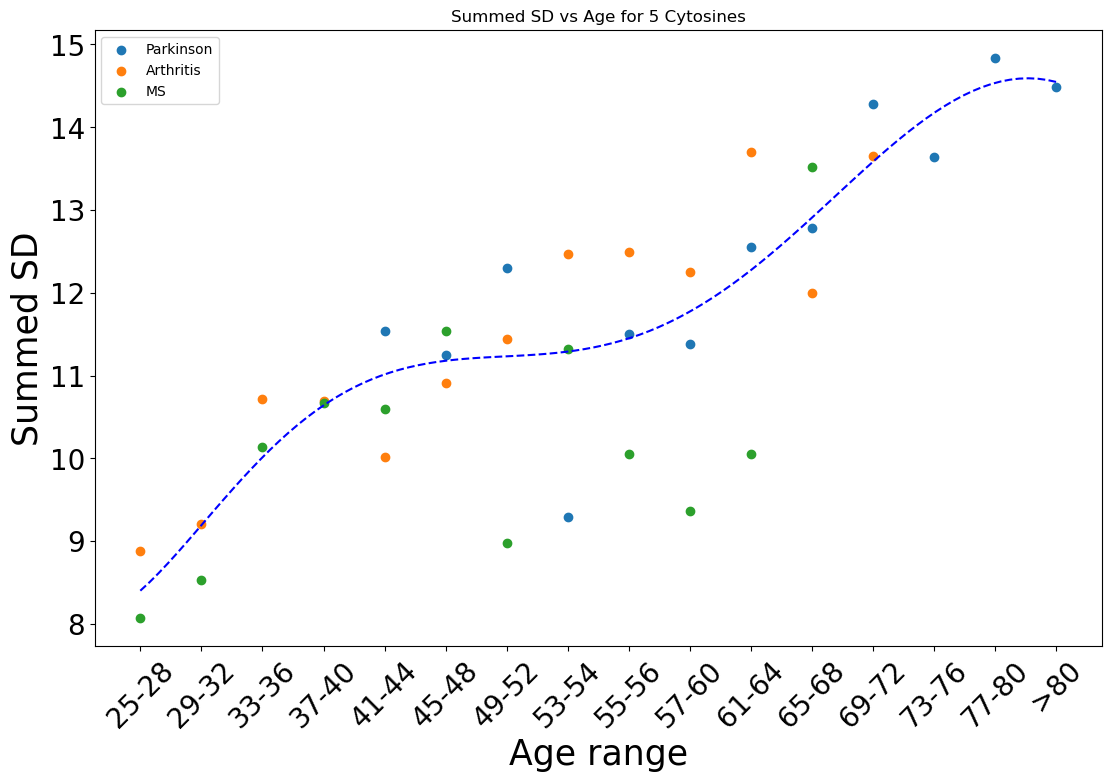

In [45]:
x = np.array(np.arange(16))
my_xticks = fig5b_293.head(16).index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
for i in ['Parkinson', 'Arthritis', 'MS']:
    test = fig5b_293[i][:16]
    test = test.replace(0, np.nan)
    plt.scatter(x, test, label = i)

popt, pcov = curve_fit(poly_6, np.array(np.arange(16)),  fig5b_293['Median'][:16])
x_range = np.linspace(0, 15, 100)

plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
#plt.title("", fontsize=20)


#     zip_agegroup_SD = list(zip(x, hthy_SD[i]))
#     first_numbers = [item[0] for item in zip_agegroup_SD if not math.isnan(item[1])]
#     second_numbers = [item[1] for item in zip_agegroup_SD if not math.isnan(item[1])]

#     popt, pcov = curve_fit(poly_6, first_numbers, second_numbers)
#     x_range = np.linspace(min(first_numbers), max(first_numbers), 100)
    
#     y_pred = poly_6(np.array(first_numbers), *popt)
#     y_true = second_numbers
#     mar = np.mean(np.abs(y_true - y_pred))
#     ssr = np.sum((y_pred - np.mean(y_true))**2)
#     sst = np.sum((y_true - np.mean(y_true))**2)
#     r2 = ssr/sst
#     print(str(i)+ f" healthy dataset has MAE: {mar:.5f} and R squared: {r2:.5f}")
plt.title('Summed SD vs Age for 5 Cytosines')
plt.xlabel('Age range', fontsize=25)
plt.ylabel('Summed SD', fontsize=25)
plt.legend()
plt.savefig('Summed_SD_vs_Age_for_5Cyt.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

plt.show()


In [88]:
f_sig_outof480k

,Unnamed: 0,name,LM Statistic,LM-Test p-value,F Statistic,F-Test p-value
0,0,cg00050873,43.772226,3.125949e-10,23.009652,1.873652e-10
1,1,cg00212031,32.831622,7.425128e-08,17.024019,5.666616e-08
2,2,cg00213748,31.513677,1.435133e-07,16.313928,1.121689e-07
3,3,cg00455876,31.873563,1.198792e-07,16.507600,9.309860e-08
4,4,cg01707559,27.461167,1.088638e-06,14.144957,9.092744e-07
...,...,...,...,...,...,...
372504,448845,cg27657537,8.078996,1.760631e-02,4.064219,1.751733e-02
372505,448847,cg27662284,9.828799,7.340123e-03,4.954922,7.257282e-03
372506,448848,cg27662611,39.366726,2.828943e-09,20.579668,1.886523e-09
372507,448849,cg27665648,48.396036,3.096951e-11,25.589214,1.636867e-11


In [53]:
hthy_SD = pd.read_excel(r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/lab_data+code/datasets/dataset_SD.xlsx',
             sheet_name='Healthy')
dis_SD = pd.read_excel(r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/lab_data+code/datasets/dataset_SD.xlsx',
             sheet_name='Disease')

In [197]:
hthy_SD460 = pd.read_excel(r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/lab_data+code/datasets/dataset_SD.xlsx',
             sheet_name='460cpg_h')
dis_SD460 = pd.read_excel(r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/lab_data+code/datasets/dataset_SD.xlsx',
             sheet_name='460cpg_d')

hthy_SD460 = hthy_SD460.set_index('Age_group')
dis_SD460 = dis_SD460.set_index('Age_group')

In [33]:
# test for first cpg: cg00050873
# dependent variable
cg00050873_beta = combine_healthy_common['cg00050873']
# independent variable
cg00050873_age = combine_healthy_common['Age']
cg00050873_beta = sm.add_constant(cg00050873_beta)
cg00050873_model = sm.OLS(cg00050873_age, cg00050873_beta).fit()
# get residuals
cg00050873_resi = cg00050873_model.resid
# perform whites test
white_test = het_white(cg00050873_resi, cg00050873_model.model.exog)
# display results
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))
# test success


{'LM Statistic': 43.772226124683314, 'LM-Test p-value': 3.125948845302641e-10, 'F-Statistic': 23.009651649281395, 'F-Test p-value': 1.8736522915093893e-10}


In [13]:
name, LM_Statistic, LM_P, F_Statistic, F_P = [], [], [], [], []
cg_age = combine_healthy_common['Age']
for i in combine_healthy_common.iloc[:,:-1]:
    cg_beta = combine_healthy_common[i]
    cg_beta = sm.add_constant(cg_beta)
    cg_model = sm.OLS(cg_age, cg_beta).fit()
    cg_resi = cg_model.resid
    white_test = het_white(cg_resi, cg_model.model.exog)
    a, b, c, d = white_test
    name.append(i)
    LM_Statistic.append(a)
    LM_P.append(b)
    F_Statistic.append(c)
    F_P.append(d)
heterosk_480k = pd.DataFrame(data={'name':name, 'LM Statistic': LM_Statistic, 
                   'LM-Test p-value': LM_P, 
                   'F Statistic': F_Statistic,
                   'F-Test p-value': F_P
                  })


In [45]:
#heterosk_480k.set_index('name')

In [28]:
heterosk_480k[(heterosk_480k['LM-Test p-value']<0.05) &(heterosk_480k['F-Test p-value']<0.05)]


,name,LM Statistic,LM-Test p-value,F Statistic,F-Test p-value
0,cg00050873,43.772226,3.125949e-10,23.009652,1.873652e-10
1,cg00212031,32.831622,7.425128e-08,17.024019,5.666616e-08
2,cg00213748,31.513677,1.435133e-07,16.313928,1.121689e-07
3,cg00455876,31.873563,1.198792e-07,16.507600,9.309860e-08
4,cg01707559,27.461167,1.088638e-06,14.144957,9.092744e-07
...,...,...,...,...,...
448845,cg27657537,8.078996,1.760631e-02,4.064219,1.751733e-02
448847,cg27662284,9.828799,7.340123e-03,4.954922,7.257282e-03
448848,cg27662611,39.366726,2.828943e-09,20.579668,1.886523e-09
448849,cg27665648,48.396036,3.096951e-11,25.589214,1.636867e-11


In [15]:
# f test significant, unequal variance of the beta values 
#(different SD but not sure if it is noiser in old compared to young)
f_sig_outof480k = heterosk_480k[heterosk_480k['F-Test p-value']<0.05]
f_sig_outof480k

In [10]:
# f_sig_outof480k.to_excel("/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/lab_data+code/datasets/f_sig_outof480k.xlsx",
#              sheet_name='Sheet1')  

In [415]:
seen1 = set()
repeated1 = set()
for l in [f_sig_outof480k['name'], f_sig_outof480k_lm['name']]:
    for i in set(l):
        if i in seen1:
            repeated1.add(i)
        else:
            seen1.add(i)          
            
len(repeated1)

372508

In [89]:
common_h_fsig = combine_healthy_common[f_sig_outof480k['name'].to_list()]
common_h_fsig['dataset'] = combine_healthy_common['dataset']
common_h_fsig['Age'] = combine_healthy_common['Age']
healthy_all_std = pd.DataFrame(data={'young_std': common_h_fsig[
    common_h_fsig['Age'].between(25, 28,inclusive = 'both')].std(), 
                        'old_std': common_h_fsig[common_h_fsig['Age']>67].std(), 
                        'young_mean': common_h_fsig[common_h_fsig
                                                             ['Age'].between(25, 28,inclusive = 'both')].mean(),
                        'old_mean': common_h_fsig[common_h_fsig['Age']>67].mean()})

# please pick which healthy_all_std pool would you like to select from, the 
# filters I applied is the 20perc in the following plots 
healthy_all_std['o_sd/y_sd'] = healthy_all_std['old_std']/healthy_all_std['young_std']
healthy_all_std_20perc = healthy_all_std[healthy_all_std['o_sd/y_sd']>=1.2]
#healthy_all_std_omorey = healthy_all_std[healthy_all_std['o_sd/y_sd']>1]

common_h_fsig = common_h_fsig[healthy_all_std_20perc.index.to_list()]
common_h_fsig['dataset'] = combine_healthy_common['dataset']
common_h_fsig['age_group'] = pd.cut(
    common_h_fsig['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=[ '25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])
common_h_fsig

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_3078/2099671052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_h_fsig['dataset'] = combine_healthy_common['dataset']
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_3078/2099671052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_h_fsig['Age'] = combine_healthy_common['Age']
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_3078/2099671052.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reduct

,cg02011394,cg02494853,cg03695421,cg03706273,cg03767353,cg04016144,cg04023335,cg05480730,cg11131351,cg14210405,...,cg27512868,cg27528247,cg27598806,cg27612019,cg27634071,cg27634744,cg27648216,Age,dataset,age_group
0,0.278237,0.023765,0.000000,0.026480,0.498413,0.566893,0.102472,0.734807,0.000000,0.111952,...,0.893289,0.827940,0.924419,0.600085,0.116871,0.959207,0.909472,46.2,parknor,45-48
1,0.979937,0.018487,0.732449,0.014908,0.813016,0.949955,0.717820,0.008652,0.795950,0.316092,...,0.895520,0.834553,0.897510,0.604072,0.049683,0.938547,0.911306,66.0,parknor,65-68
2,0.616319,0.014499,0.364407,0.020311,0.694215,0.379141,0.232416,0.625551,0.475410,0.199224,...,0.868149,0.873413,0.900653,0.791084,0.051148,0.918317,0.901814,41.4,parknor,41-44
3,0.770335,0.028028,0.310023,0.109307,0.444186,0.417191,0.112794,1.000000,0.560345,0.209131,...,0.851541,0.876932,0.895756,0.812943,0.082006,0.942567,0.904906,42.4,parknor,41-44
4,0.390710,0.016192,0.457944,0.060808,0.668367,0.496689,0.131422,0.465306,1.000000,0.223716,...,0.891383,0.899428,0.929399,0.757748,0.271972,0.974692,0.915341,63.4,parknor,61-64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,0.465241,0.013494,0.000000,0.019316,0.130137,0.067039,0.078756,0.000000,0.268156,0.129578,...,0.825476,0.809546,0.852788,0.616472,0.074764,0.897954,0.906122,48.0,down_nor,45-48
834,0.237569,0.018955,0.000000,0.029216,0.090909,0.074074,0.171127,0.000000,0.000000,0.183947,...,0.848925,0.855674,0.908585,0.474743,0.123818,0.902494,0.919701,58.0,down_nor,57-60
835,0.976255,0.012361,0.725019,0.010623,0.470508,0.953734,0.607951,0.024902,0.896761,0.401938,...,0.872787,0.835256,0.928185,0.586700,0.028438,0.904038,0.922268,44.0,Werner_Syndrome_h,41-44
836,0.390233,0.018297,0.287872,0.023396,0.403164,0.372904,0.076645,0.280558,0.369086,0.339271,...,0.701901,0.822342,0.915024,0.474364,0.048880,0.910285,0.929420,53.0,Werner_Syndrome_h,53-54


In [53]:
common_d_fsig = combine_dis_nohiv[healthy_all_std_20perc.index.to_list()]
common_d_fsig['dataset'] = combine_dis_nohiv['dataset']
common_d_fsig['age_group'] = pd.cut(
    common_d_fsig['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=[ '25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])
common_d_fsig = common_d_fsig.dropna(axis=0)
common_d_fsig

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_53599/2869269545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_d_fsig['dataset'] = combine_dis_nohiv['dataset']
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_53599/2869269545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_d_fsig['age_group'] = pd.cut(


In [82]:
# after two filters
common_h_fsig = combine_healthy_common[healthy_all_std_20perc.index.to_list()]
common_h_fsig

,cg02011394,cg02494853,cg03695421,cg03706273,cg03767353,cg04016144,cg04023335,cg05480730,cg11131351,cg14210405,...,cg27467114,cg27501362,cg27512868,cg27528247,cg27598806,cg27612019,cg27634071,cg27634744,cg27648216,Age
0,0.278237,0.023765,0.000000,0.026480,0.498413,0.566893,0.102472,0.734807,0.000000,0.111952,...,0.906596,0.974706,0.893289,0.827940,0.924419,0.600085,0.116871,0.959207,0.909472,46.2
1,0.979937,0.018487,0.732449,0.014908,0.813016,0.949955,0.717820,0.008652,0.795950,0.316092,...,0.828637,0.965411,0.895520,0.834553,0.897510,0.604072,0.049683,0.938547,0.911306,66.0
2,0.616319,0.014499,0.364407,0.020311,0.694215,0.379141,0.232416,0.625551,0.475410,0.199224,...,0.915946,0.905974,0.868149,0.873413,0.900653,0.791084,0.051148,0.918317,0.901814,41.4
3,0.770335,0.028028,0.310023,0.109307,0.444186,0.417191,0.112794,1.000000,0.560345,0.209131,...,0.895359,0.932588,0.851541,0.876932,0.895756,0.812943,0.082006,0.942567,0.904906,42.4
4,0.390710,0.016192,0.457944,0.060808,0.668367,0.496689,0.131422,0.465306,1.000000,0.223716,...,0.921640,0.921306,0.891383,0.899428,0.929399,0.757748,0.271972,0.974692,0.915341,63.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,0.465241,0.013494,0.000000,0.019316,0.130137,0.067039,0.078756,0.000000,0.268156,0.129578,...,0.818075,0.917934,0.825476,0.809546,0.852788,0.616472,0.074764,0.897954,0.906122,48.0
834,0.237569,0.018955,0.000000,0.029216,0.090909,0.074074,0.171127,0.000000,0.000000,0.183947,...,0.864925,0.922119,0.848925,0.855674,0.908585,0.474743,0.123818,0.902494,0.919701,58.0
835,0.976255,0.012361,0.725019,0.010623,0.470508,0.953734,0.607951,0.024902,0.896761,0.401938,...,0.860188,0.917649,0.872787,0.835256,0.928185,0.586700,0.028438,0.904038,0.922268,44.0
836,0.390233,0.018297,0.287872,0.023396,0.403164,0.372904,0.076645,0.280558,0.369086,0.339271,...,0.813483,0.920986,0.701901,0.822342,0.915024,0.474364,0.048880,0.910285,0.929420,53.0


In [11]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [37]:
hannum_cpg_pub = pd.read_excel (r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/hannum_model.xlsx','Model_AllData')
Phenoage_cpg = pd.read_csv(r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/PhenoAge_513CpG.csv')
PACEcpgs = pd.read_excel('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/pacecpg.xlsx')
PACEcpgs = PACEcpgs.iloc[1::2]
PACEcpgs = PACEcpgs.rename(columns={'Intercept':'cpg'})
PACEcpgs['coefficient'] =PACEcpgs.iloc[:,1]
hannum_cpg_all = pd.read_excel (r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/hannum_model.xlsx','Model_AllData')
hannum_cpg_pri = pd.read_excel (r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/hannum_model.xlsx','Model_PrimaryData')


In [14]:
# after two filters
common_h_fsig = combine_healthy_common[healthy_all_std_omorey.index.to_list()]

,cg00213748,cg00455876,cg02011394,cg02494853,cg02839557,cg03443143,cg03695421,cg03706273,cg03750315,cg03767353,...,cg27532722,cg27552198,cg27553637,cg27592453,cg27598806,cg27612019,cg27634071,cg27634744,cg27648216,Age
0,0.407407,0.353630,0.278237,0.023765,0.368526,0.368984,0.000000,0.026480,0.719078,0.498413,...,0.829637,0.891700,0.102599,0.868847,0.924419,0.600085,0.116871,0.959207,0.909472,46.2
1,0.929293,0.786912,0.979937,0.018487,0.032043,0.921351,0.732449,0.014908,0.026602,0.813016,...,0.851095,0.916508,0.072129,0.830520,0.897510,0.604072,0.049683,0.938547,0.911306,66.0
2,0.571429,0.368169,0.616319,0.014499,0.639944,0.757282,0.364407,0.020311,0.595238,0.694215,...,0.875740,0.906016,0.059329,0.852093,0.900653,0.791084,0.051148,0.918317,0.901814,41.4
3,0.329815,0.314706,0.770335,0.028028,0.596346,0.535248,0.310023,0.109307,0.387622,0.444186,...,0.822826,0.918693,0.069200,0.821845,0.895756,0.812943,0.082006,0.942567,0.904906,42.4
4,0.029851,0.174355,0.390710,0.016192,0.647520,0.652111,0.457944,0.060808,0.290640,0.668367,...,0.873549,0.916999,0.102231,0.856558,0.929399,0.757748,0.271972,0.974692,0.915341,63.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,0.109948,0.092784,0.465241,0.013494,0.121951,0.240964,0.000000,0.019316,0.350649,0.130137,...,0.717690,0.865867,0.054693,0.830734,0.852788,0.616472,0.074764,0.897954,0.906122,48.0
834,0.292517,0.287449,0.237569,0.018955,0.104167,0.126543,0.000000,0.029216,0.122807,0.090909,...,0.785430,0.885362,0.058470,0.885629,0.908585,0.474743,0.123818,0.902494,0.919701,58.0
835,0.859101,0.881824,0.976255,0.012361,0.024268,0.870739,0.725019,0.010623,0.023949,0.470508,...,0.821329,0.882974,0.048566,0.926457,0.928185,0.586700,0.028438,0.904038,0.922268,44.0
836,0.312797,0.351411,0.390233,0.018297,0.370549,0.357393,0.287872,0.023396,0.378231,0.403164,...,0.628894,0.845292,0.046336,0.906036,0.915024,0.474364,0.048880,0.910285,0.929420,53.0


In [90]:
common_h_fsig['dataset'] = combine_healthy_common['dataset']

In [16]:
# first filter about change in methylation status (+/-0.001 is the limit)
# if O mean / Y mean > 1.001, the cpg is reported to be increase in methylation
# between will be reported to be highly regulated
# if O/Y < 0.999, the cpg is reported to be decrease in methylation
healthy_all_std['O/Y'] = healthy_all_std['old_mean']/healthy_all_std['young_mean']

# healthy_all_std['change as age'] = None

# healthy_all_std.loc[healthy_all_std['O/Y'].between(1-0.001, 1+0.001,inclusive = 'both'),'change as age'] = 'highly regulated'
# healthy_all_std.loc[healthy_all_std['O/Y']>1+0.001,'change as age'] = 'increase in methylation'
# healthy_all_std.loc[healthy_all_std['O/Y']<1-0.001,'change as age'] = 'decrease in methylation'


In [17]:
# healthy_all_std[healthy_all_std['change as age'] =='highly regulated']
# healthy_all_std = healthy_all_std.drop(columns = 'status')


In [240]:
# second filter, using the average beta values, classify to unmethylated, half-methylated, and nearly methylated
healthy_all_std['status'] = None
healthy_all_std.loc[healthy_all_std['young_mean'].between(0.01, 0.1, inclusive = 'both'), 'status'] = 'unmethylated' 
healthy_all_std.loc[healthy_all_std['young_mean'].between(0.4, 0.6, inclusive = 'both'), 'status'] = 'half_methylated'
healthy_all_std.loc[healthy_all_std['young_mean']>0.9, 'status'] = 'nearly methylated'


In [225]:
healthy_all_std

,young_std,old_std,young_mean,old_mean,o_sd/y_sd,O/Y,status
cg00050873,0.211823,0.200020,0.575351,0.764835,0.944278,1.329336,half_methylated
cg00212031,0.270497,0.253144,0.381895,0.221335,0.935848,0.579572,None
cg00213748,0.243255,0.266573,0.544319,0.696117,1.095856,1.278877,half_methylated
cg00455876,0.220322,0.254771,0.466846,0.575022,1.156359,1.231718,half_methylated
cg01707559,0.109299,0.084397,0.198207,0.158203,0.772164,0.798175,None
...,...,...,...,...,...,...,...
cg27657537,0.043948,0.016469,0.121561,0.101147,0.374732,0.832066,None
cg27662284,0.098584,0.097747,0.758039,0.822316,0.991508,1.084794,None
cg27662611,0.041347,0.020557,0.100140,0.056972,0.497174,0.568926,None
cg27665648,0.044437,0.039123,0.789265,0.823859,0.880409,1.043831,None


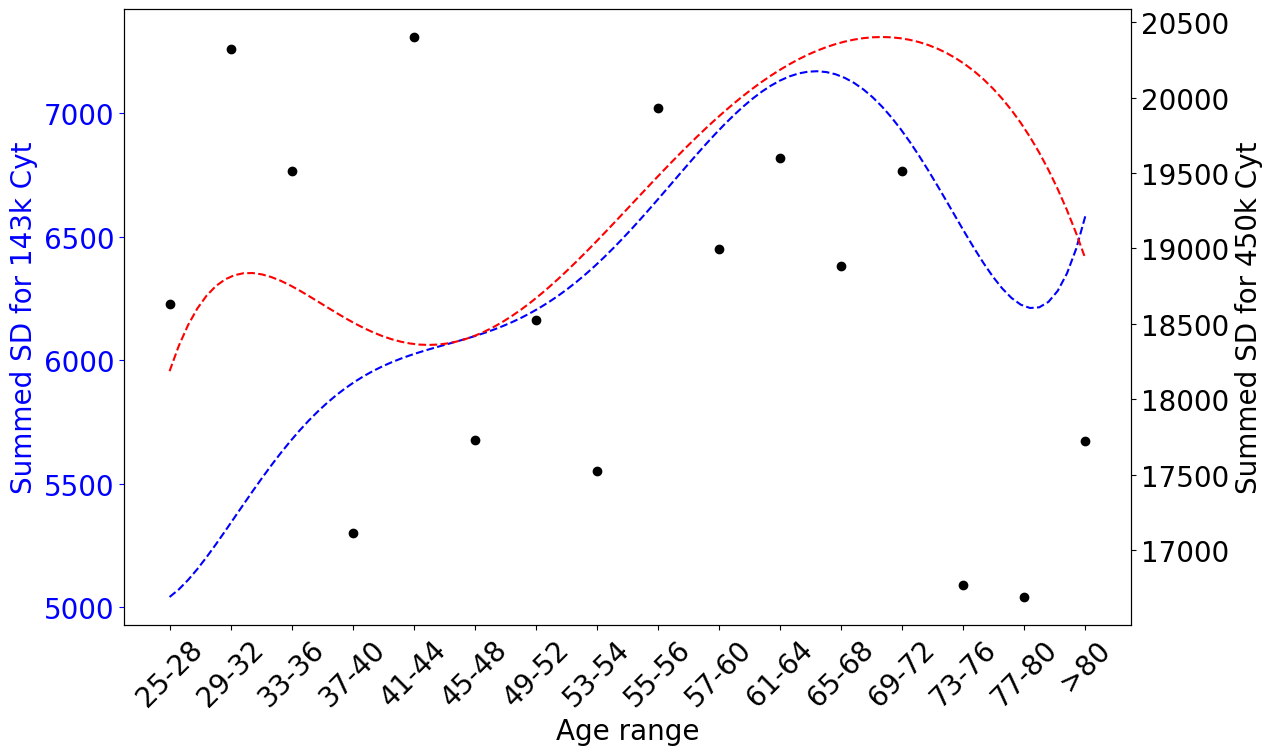

In [129]:
# there are 143450 cpgs in total passing the two filters without classification
x = np.array(np.arange(16))
my_xticks = common_h_fsig.groupby('age_group').std().index.to_list()
# plt.scatter(x, common_d_fsig.groupby('age_group').std().dropna(axis=0).drop(columns='Age').sum(axis=1),color = 'r')

fig,ax = plt.subplots(figsize=(13, 8))

ax.set_xticks(x, my_xticks,fontsize=20, rotation=45)

popt, pcov = curve_fit(poly_6, x, sumSD_allpassed2filters)
x_range = np.linspace(0, 15, 100)

popt_d, pcov_d = curve_fit(poly_6, x, sumSD_allpassed2filters_d)

ax.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
ax.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='--')

# set primary x-axis label
ax.set_xlabel('Age range', fontsize=20)
# set left y-axis label
ax.set_ylabel('Summed SD for 143k Cyt', color = 'b', fontsize=20)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax.tick_params(axis='y', labelsize=20, colors = 'blue')
ax2.tick_params(axis='y', labelsize=20)

ax2.scatter(x, sumSD_450k,color = 'black')
ax2.set_ylabel('Summed SD for 450k Cyt', color='black', fontsize=20)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')
# comment the next two lines to erase the scatter dots
# y_pred = poly_6(x, *popt)
# y_true = sumSD_allpassed2filters
# mar = np.mean(np.abs(y_true - y_pred))
# ssr = np.sum((y_pred - y_true.mean())**2)
# sst = np.sum((y_true - y_true.mean())**2)
# r2 = ssr/sst
# print(f"Healthy data MAE: {mar:.5f}")
# print(f"Healthy data R squared: {r2:.5f}")


In [48]:
def sumSD_plot(df, title, line):
    sumSD_df = df.groupby('age_group').std().dropna(axis=0).sum(axis=1)
    x = np.array(np.arange(len(sumSD_df)))
    my_xticks = df.groupby('age_group').std().dropna(axis=0).index.to_list()
    plt.figure(figsize=(13, 8))
    plt.xticks(x, my_xticks)
    plt.xticks(fontsize=20, rotation=45)
    plt.yticks(fontsize=20)
    plt.scatter(x, df.groupby('age_group').std().dropna(axis=0).sum(axis=1),color = 'b')
    popt, pcov = curve_fit(poly_6, x, sumSD_df)
    x_range = np.linspace(0, len(sumSD_df)-1, 100)
    plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle = line)
    plt.title("Summed SD with Age for " + str(title) +" CpGs Passed 2 Filters", fontsize=20)
    plt.xlabel('Age range', fontsize=20)
    plt.ylabel('Summed SD', fontsize=20)
    
    y_pred = poly_6(x, *popt)
    y_true = sumSD_df
    mar = np.mean(np.abs(y_true - y_pred))
    ssr = np.sum((y_pred - y_true.mean())**2)
    sst = np.sum((y_true - y_true.mean())**2)
    r2 = ssr/sst
    print(f"MAE: {mar:.5f}")
    print(f"R squared: {r2:.5f}")
    plt.show()
    